<a href="https://colab.research.google.com/github/jdasam/mas1004/blob/2024/live_coding/2_function_approximation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Function Approximation
- Function takes an input, and gives an output
  - $f(x) = y$
- Everything in the word can be regarded as a function
- And Neural Network can approximate many functions

## A. Regression with One Variable
- Regression:
  - Process of training a model to predict a **continuous** numerical output based on one or more input features.
  - e.g.: Predicts the child's height based on the parent's height.
  - Why is it named "regression"?:
    - The term was first used by Sir Francis Galton, a British statistician and cousin of Charles Darwin, in the late 19th century. Galton was studying the relationship between heights of parents and their children. He observed that although tall parents often had tall children, the children's heights tended to "regress" towards the average or mean height of the population. Similarly, children of short parents were often short but their heights still regressed towards the average.

- What is the difference between continuous and discrete?
  - In continuous value, you always can havee a middle point between to given points
    - For example, if we have 1.0 and 2.0, there exists their middle point 1.5
    - 2.0 is twice larger than 1.0
  - On the other hand, discrete value does not have middle point
    - Even if we have student number 20250001, 20250002, there won't be 20250001.5
    - 20250001 and 20250002 has no meaning of size or magnitude

- Let's make function that works as f(x) = ax+b
    -  In this cell, we will create a function that follows the linear equation format f(x) = ax + b. This function will take an input x and return value that is the result of the equation. The variables a and b are coefficients that we will define. The variable a is the slope of the line and b is the y-intercept. This function will help us understand the concept of function approximation in the context of regression.


In [3]:
# Let's make function that works as f(x) = ax+b

param_a = 1.7
param_b = -2.3

def my_function(x): # hidden function that we have to guess
  return param_a * x + param_b

my_function(1.0)

-0.5999999999999999

In [4]:
# Let's plot this function
# First, let's make many x candidates
# from -5 to 5, with 500 total x

xs = [ i for i in range(501)]
xs # This gives list of integers 0 to 500
xs = [ (i-250)/50 for i in range(501)]
xs

[-5.0,
 -4.98,
 -4.96,
 -4.94,
 -4.92,
 -4.9,
 -4.88,
 -4.86,
 -4.84,
 -4.82,
 -4.8,
 -4.78,
 -4.76,
 -4.74,
 -4.72,
 -4.7,
 -4.68,
 -4.66,
 -4.64,
 -4.62,
 -4.6,
 -4.58,
 -4.56,
 -4.54,
 -4.52,
 -4.5,
 -4.48,
 -4.46,
 -4.44,
 -4.42,
 -4.4,
 -4.38,
 -4.36,
 -4.34,
 -4.32,
 -4.3,
 -4.28,
 -4.26,
 -4.24,
 -4.22,
 -4.2,
 -4.18,
 -4.16,
 -4.14,
 -4.12,
 -4.1,
 -4.08,
 -4.06,
 -4.04,
 -4.02,
 -4.0,
 -3.98,
 -3.96,
 -3.94,
 -3.92,
 -3.9,
 -3.88,
 -3.86,
 -3.84,
 -3.82,
 -3.8,
 -3.78,
 -3.76,
 -3.74,
 -3.72,
 -3.7,
 -3.68,
 -3.66,
 -3.64,
 -3.62,
 -3.6,
 -3.58,
 -3.56,
 -3.54,
 -3.52,
 -3.5,
 -3.48,
 -3.46,
 -3.44,
 -3.42,
 -3.4,
 -3.38,
 -3.36,
 -3.34,
 -3.32,
 -3.3,
 -3.28,
 -3.26,
 -3.24,
 -3.22,
 -3.2,
 -3.18,
 -3.16,
 -3.14,
 -3.12,
 -3.1,
 -3.08,
 -3.06,
 -3.04,
 -3.02,
 -3.0,
 -2.98,
 -2.96,
 -2.94,
 -2.92,
 -2.9,
 -2.88,
 -2.86,
 -2.84,
 -2.82,
 -2.8,
 -2.78,
 -2.76,
 -2.74,
 -2.72,
 -2.7,
 -2.68,
 -2.66,
 -2.64,
 -2.62,
 -2.6,
 -2.58,
 -2.56,
 -2.54,
 -2.52,
 -2.5,
 -2.48,
 -2.46,
 -

In [5]:
# Now, let's make y
# y = f(x)

# Using for loop
ys = []
for x in xs:
  y = my_function(x)
  ys.append(y)
# Using list comprehension
ys = [my_function(x) for x in xs]

In [6]:
# Check the length of xs and ys are equal
# The item of xs and ys are 1:1 mapping
len(xs), len(ys)

(501, 501)

In [7]:
# We can check that i-th value of xs and ys are 1:1 mapping
idx = 57
xs[idx], ys[idx], my_function(xs[idx]) # ys[idx] has to be equal to my_function(xs[idx])`

(-3.86, -8.861999999999998, -8.861999999999998)

In [8]:
# Let's plot this function
for x, y in zip(xs, ys):
  print(x, y) # now each data sample has (x, y) value, and we have 501 data samples



-5.0 -10.8
-4.98 -10.766000000000002
-4.96 -10.732
-4.94 -10.698
-4.92 -10.663999999999998
-4.9 -10.629999999999999
-4.88 -10.596
-4.86 -10.562000000000001
-4.84 -10.527999999999999
-4.82 -10.494
-4.8 -10.46
-4.78 -10.425999999999998
-4.76 -10.392
-4.74 -10.358
-4.72 -10.323999999999998
-4.7 -10.29
-4.68 -10.256
-4.66 -10.222
-4.64 -10.187999999999999
-4.62 -10.154
-4.6 -10.12
-4.58 -10.085999999999999
-4.56 -10.052
-4.54 -10.018
-4.52 -9.983999999999998
-4.5 -9.95
-4.48 -9.916
-4.46 -9.882
-4.44 -9.847999999999999
-4.42 -9.814
-4.4 -9.780000000000001
-4.38 -9.745999999999999
-4.36 -9.712
-4.34 -9.677999999999999
-4.32 -9.644
-4.3 -9.61
-4.28 -9.576
-4.26 -9.541999999999998
-4.24 -9.508
-4.22 -9.474
-4.2 -9.44
-4.18 -9.405999999999999
-4.16 -9.372
-4.14 -9.338
-4.12 -9.303999999999998
-4.1 -9.27
-4.08 -9.236
-4.06 -9.201999999999998
-4.04 -9.168
-4.02 -9.133999999999999
-4.0 -9.1
-3.98 -9.065999999999999
-3.96 -9.032
-3.94 -8.998
-3.92 -8.963999999999999
-3.9 -8.93
-3.88 -8.896
-3.86 -

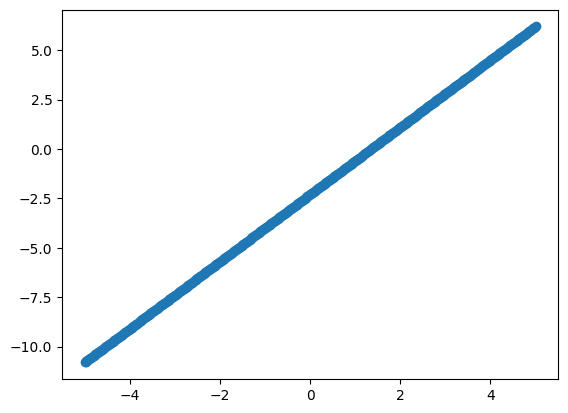

In [9]:
# To plot arbitrary number of data points on 2D space, we can use scatter
import matplotlib.pyplot as plt

plt.scatter(xs, ys)

# How can we draw ony 1 sample for every 10 samples instead of drawing every samples?
# plt.scatter(xs[::10], ys[::10]) # begin:end:step
# in python slice indexing, you can ommit initial slice if you are selecting it from very first
# and also end slice if you are selecting until the very last one


In [10]:
# Let's add some noise
# adding random noise
import random
# random.random() # this provide a random value between 0 and 1
# if you want to get random value bewtween -1 to 1
# noise = (random.random() - 0.5) * 2

ys = [my_function(x) + (random.random() - 0.5) * 2  for x in xs]


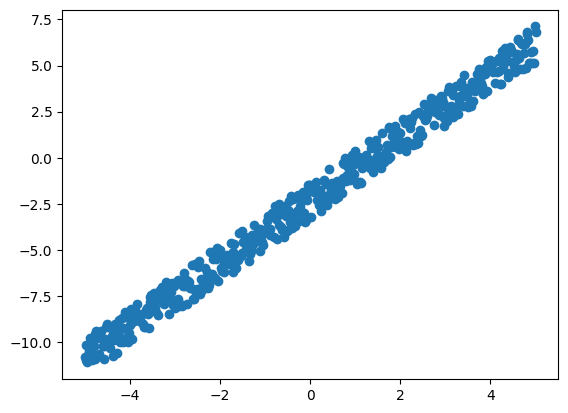

In [11]:
# plot again
plt.scatter(xs, ys)

##### (Extra) Short Explanation about Random Number Generator
- Random number generator is a function that generates a sequence of numbers that seem to occur in random order.

In [59]:
# random is not actually complete random
# usually computers uses pseudo-random

# random.random() in fact has its destiny. It will always return same value
# if the seed is the same

random.seed(0)
[random.random() for _ in range(10)]

# No matter how many times you run this code, it will always return same value

[0.8444218515250481,
 0.7579544029403025,
 0.420571580830845,
 0.25891675029296335,
 0.5112747213686085,
 0.4049341374504143,
 0.7837985890347726,
 0.30331272607892745,
 0.4765969541523558,
 0.5833820394550312]

### 1) Guess Regression manually
- Since we know the function f(x) = ax + b, we can guess the value of a and b.
- If we select correct a and b, the line will be the best fit line for the data.
    - What machine learning does is to find the best a and b automatically.
    - But here, we will find the best a and b manually, so that we can understand the concept of machine learning better.

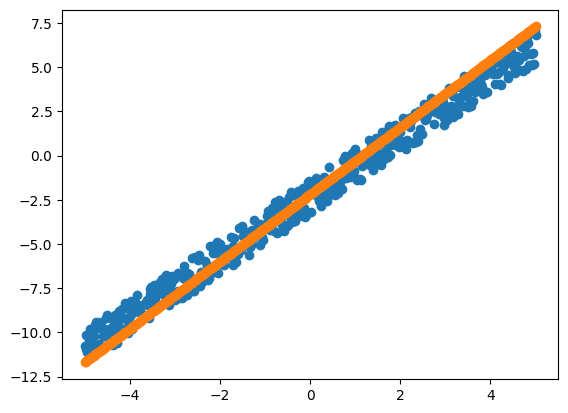

In [23]:
# Let's suppose we try guessing a and b manually

est_a = 1.9
est_b = -2.2

def my_estimation(x, est_a, est_b):
  return est_a * x + est_b

est_ys = [my_estimation(x, est_a, est_b) for x in xs]

plt.scatter(xs, ys) # coloured with blue
plt.scatter(xs, est_ys) # coloured with orange

#### 1-1) Calculating Error
- How can we calculates how good or bad our estimation is?
    - We can calculate the error between the actual value and the predicted value.
        - There are many ways to calculate the error.
            - For example, we can calculate the absolute value of the difference between the actual value and the predicted value.
              - $y-\hat{y}$
            - Or we can calculate the square of the difference between the actual value and the predicted value.
              - $(y-\hat{y})^2$
    - We call this error value as **loss**.
        - Sometimes, we call this error as **cost**.
    - The function that calculates the loss is called **loss function**.
        - Sometimes, we call this loss function as **cost function** or **objective function**.

In [14]:
def cal_error(pred, target):
  # return abs(pred-target)
  return (pred - target) ** 2 # square of error

errors = []
for y, est_y in zip(ys, est_ys):
  errors.append(cal_error(est_y, y))
errors = [cal_error(est_y, y) for y, est_y in zip(ys, est_ys)]
sum(errors) / len(errors) # mean of the errors

0.7060843877109705

In [ ]:
# compare every value in y_noise and estimation
# we have to compare values in the same idx


In [38]:
# change a and b to get better estimation

est_a = -2.1
est_b = 3.1

est_ys = [my_estimation(x, est_a, est_b) for x in xs]

errors = []
for y, est_y in zip(ys, est_ys):
  errors.append(cal_error(est_y, y))
errors = [cal_error(est_y, y) for y, est_y in zip(ys, est_ys)]
sum(errors) / len(errors) # mean of the errors

149.62998067466827

In [25]:
def get_loss(est_a, est_b, xs, ys):
  est_ys = [my_estimation(x, est_a, est_b) for x in xs]
  errors = [cal_error(est_y, y) for y, est_y in zip(ys, est_ys)]
  return sum(errors) / len(errors)

get_loss(est_a, est_b, xs, ys)

149.62998067466827

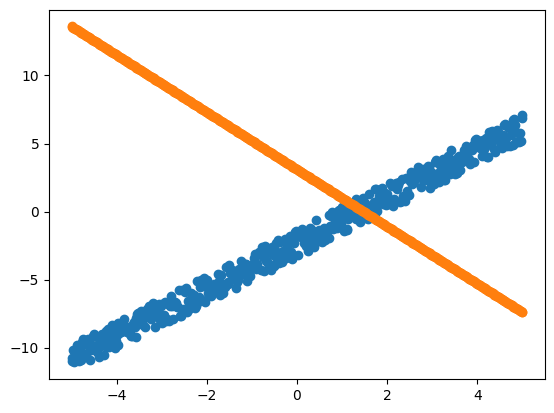

In [22]:
plt.scatter(xs, ys) # coloured with blue
plt.scatter(xs, est_ys) # coloured with orange

#### (Extra) calculate gradient
- How can we calculate the slope (gradient) of each parameter?
  - We can calculate the gradient of the loss function with respect to each parameter.
  - One brutal way to calculate the gradient is to calculate the loss function for each parameter and see how the loss function changes when we change the parameter a little bit.

In [42]:
# calculate the gradient
eps = 0.000001
learning_rate = 0.01

loss_record = []

for _ in range(100):
  # calculate loss
  prev_loss = get_loss(est_a, est_b, xs, ys)
  print(f"Loss: {prev_loss:.4f}")

  # calculate gradient
  new_loss = get_loss(est_a+eps, est_b, xs, ys)
  grad_a = (new_loss - prev_loss) / eps
  grad_b = (get_loss(est_a, est_b+eps, xs, ys) - prev_loss) / eps
  # to get the gradient of each parameter, we only change that parameter, while preserving other parameters

  # print(grad_a, grad_b)

  # update parameters
  # new_param = old_param - param_gradient * learning_rate
  est_a = est_a - grad_a * learning_rate
  est_b = est_b - grad_b * learning_rate
  loss_record.append(prev_loss)


Loss: 0.8515
Loss: 0.8314
Loss: 0.8120
Loss: 0.7935
Loss: 0.7756
Loss: 0.7585
Loss: 0.7421
Loss: 0.7263
Loss: 0.7111
Loss: 0.6966
Loss: 0.6826
Loss: 0.6691
Loss: 0.6562
Loss: 0.6439
Loss: 0.6320
Loss: 0.6205
Loss: 0.6096
Loss: 0.5990
Loss: 0.5889
Loss: 0.5792
Loss: 0.5698
Loss: 0.5609
Loss: 0.5522
Loss: 0.5440
Loss: 0.5360
Loss: 0.5284
Loss: 0.5211
Loss: 0.5140
Loss: 0.5073
Loss: 0.5008
Loss: 0.4945
Loss: 0.4886
Loss: 0.4828
Loss: 0.4773
Loss: 0.4720
Loss: 0.4669
Loss: 0.4620
Loss: 0.4573
Loss: 0.4528
Loss: 0.4485
Loss: 0.4443
Loss: 0.4403
Loss: 0.4365
Loss: 0.4328
Loss: 0.4292
Loss: 0.4258
Loss: 0.4226
Loss: 0.4194
Loss: 0.4164
Loss: 0.4135
Loss: 0.4107
Loss: 0.4081
Loss: 0.4055
Loss: 0.4030
Loss: 0.4007
Loss: 0.3984
Loss: 0.3962
Loss: 0.3941
Loss: 0.3921
Loss: 0.3902
Loss: 0.3883
Loss: 0.3866
Loss: 0.3848
Loss: 0.3832
Loss: 0.3816
Loss: 0.3801
Loss: 0.3787
Loss: 0.3773
Loss: 0.3759
Loss: 0.3746
Loss: 0.3734
Loss: 0.3722
Loss: 0.3711
Loss: 0.3700
Loss: 0.3689
Loss: 0.3679
Loss: 0.3669

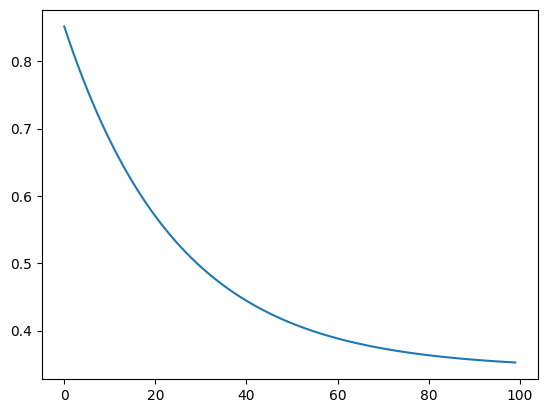

In [43]:
plt.plot(loss_record)

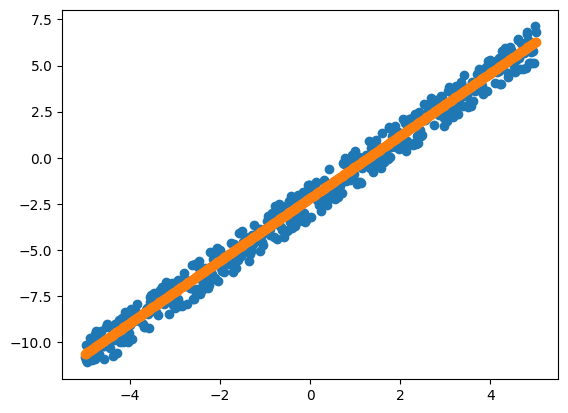

In [44]:
est_ys = [my_estimation(x, est_a, est_b) for x in xs]
plt.scatter(xs, ys) # coloured with blue
plt.scatter(xs, est_ys) # coloured with orange

##### (Extra) Naming Convention
- CamelCase
  - uses upper letter to distinguish words
    - MyModelFunction
    - myModelFunction
  - In Python, only used for Class names
- snake_case
  - uses underbar
    - my_model_function

### 2. Using Artificial Neural Network

#### 2-1) Define the function
- We want to design more complex function that is not linear.
    - And we will try approximating the function using neural network.

- To do this, we will practice with ``class``
    - ``class`` is a template for creating objects.
        - It has attributes and methods.
            - Attributes are variables that store data.
            - Methods are functions that are defined inside the class.
        - We can create an object from a class.
            - We call this process as **instantiation**.
            - The object that is created from a class is called **instance**.
        - We can access the attributes and methods of an object using dot notation.
            - ``object.attribute``
            - ``object.method()``
        - We can define a class using ``class`` keyword.
            - ``class ClassName:``
        - We can define a method using ``def`` keyword.
            - ``def method_name(self, arguments):``
            - Every method should have ``self`` as the first argument.
                - ``self`` is a reference to the current instance of the class.
                - We can access the attributes and methods of the class using ``self``.
                - ``self`` is not a keyword. You can use any word instead of ``self``.
                    - But it is a convention to use ``self``.
            - There are special methods that are defined using double underscore.
                - ``__init__`` is a special method that is called when an instance of a class is created.
                    - We call this process as **instantiation**.
                    - ``class_instance = ClassName(arguments)``
                - ``__call__`` is a special method that is called when an instance of a class is called.
                    - ``class_instance(arguments)``
                

        - We can define an attribute using ``self``.
            - ``self.attribute_name = value``
    



In [8]:
# Let's assume we are making a student object

# for each student, we want to assign Name, ID, Major
student_a = {"Name": 'Dasaem', "ID": 20210001, "Major": "Art & Technology"}
student_b = {"Name": 'Jeong', "ID": 20213249, "Major": "Media & Entertainment"}
student_c = {'name': 'Kim', "id": 20240102, 'major': 'Art & technology'}

# make a function that introduce oneself
def introduce_student(student):
  # Hi, my name is ~~, ID ~~, who majors in ~~~
  # print("Hi, my name is " + student['Name'] + ', ID ' + str(student['ID']) + ' who majors in ' + student['Major'])
  # we can do the same thing with formatted string
  print(f"Hi, my name is {student['Name']}, ID {student['ID']}, who majors in {student['Major']}")
  # print("Hi, my name is {student['Name']}")

introduce_student(student_a)
introduce_student(student_b)
introduce_student(student_c)

Hi, my name is Dasaem, ID 20210001, who majors in Art & Technology
Hi, my name is Jeong, ID 20213249, who majors in Media & Entertainment


KeyError: 'Name'

In [9]:
class Student: # class name has to start with upper case
  # class has attribute and method
  # some method is called special method, whitch starts and ends with __
  def __init__(self, name, id, major): # every method of class takes itself as an input argument

    # we want to assign some data of each variable in this class
    self.name = name
    self.id =  id
    self.major = major

  def introduce(self):
    print(f"Hi, my name is {self.name}, ID {self.id}, who majors in {self.major}")



# student_a = {"Name": 'Dasaem', "ID": 20210001, "Major": "Art & Technology"}
student_a = Student('Dasaem', 20210001, "Art & Technology")
# Student is a class, student_a is an instance of Student

student_b = Student('Jeong', 20213249, 'Media & Entertainment')

student_b.introduce()



Hi, my name is Jeong, ID 20213249, who majors in Media & Entertainment


In [33]:
_ = 'underbar'
_

'underbar'

In [1]:
import random
random.seed(0)
[(random.random()-0.5) * 2 for _ in range(4)]
# we use _ when we don't have to name that variable
# in this case, we don't care which for loop index we are in

[0.6888437030500962, 0.515908805880605, -0.15885683833831, -0.4821664994140733]

In [2]:
# lets make a function that is f(x) = ax^3 + bx^2 + cx + d

class MyFunction:
  def __init__(self, params=None):
    # if user provide params, use that
    # else make randomly selected params
    if params is None:
      self.params = [(random.random()-0.5) * 2 for _ in range(4)]
    else:
      self.params = params
    self.a, self.b, self.c, self.d = self.params

  def __call__(self, x): # this function is called when func_a(x)
    return self.a * x**3 + self.b * x**2 + self.c * x + self.d

  def __len__(self): # this is called with len(func_a)
    return len(self.params)

  def __repr__(self): # this is called when you print(func_a)
    return f"MyFunction object with param {self.params}"

  def return_answer(self, x): # this function is called when func_a.return_answer(x)
    return self.a * x**3 + self.b * x**2 + self.c * x + self.d


func_a = MyFunction([1.7, -3.2, 1.5, 0.3]) # this calls __init__ function of MyFunction
# func_a.params

x= 1.5
func_a(x) # Remember, python always "Calls" a function with ()
# func_a.return_answer(x)

1.0874999999999997

In [3]:
len(func_a)

4

In [4]:
func_b = MyFunction()
func_c = MyFunction()


In [5]:
func_b(x), func_c(x) # each class instance has its own parameters as its attribute

(0.10632920702714455, 1.450960985296828)

In [6]:
print(func_b)

MyFunction object with param [0.02254944273721704, -0.19013172509917142, 0.5675971780695452, -0.3933745478421451]


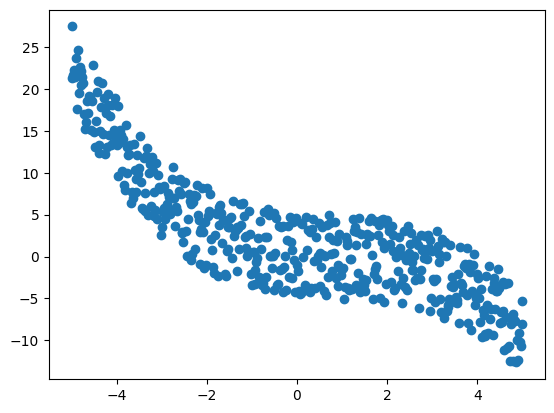

In [12]:
import matplotlib.pyplot as plt
# Let's plot our new function
# random.seed(3)
func_a = MyFunction()
xs = [ (i-250)/50 for i in range(501)]
ys = [func_a(x) +(random.random() -0.5)*10  for x in xs]

plt.scatter(xs, ys)

#### 2-2) Making Artificial Neuron
An artificial neuron is a mathematical function designed to model the behavior of biological neurons. It serves as a fundamental building block of neural networks in machine learning.

##### Basic Components
- Input: Receives various forms of information (or data) that the neural network will learn from.
- Weights: These are parameters that transform input data within the neuron's internal function.
- Bias: An additional parameter to shift the activation function.
- Activation Function: This function processes the incoming information, and depending on its output, the artificial neuron activates or not.

$\text{Output} = \text{Activation Function}(\sum^n_{i=1}(\text{Input}[i] \times \text{Weight}[i]) + \text{Bias})$


In [13]:
# First, let's build a neuron that takes one single input

single_input = xs[0]
single_input

-5.0

In [14]:
def calculate_single_neuron_output(x, weights, bias):
  # len(x) or len(weights) are not decided == input dimension is not decided
  output = 0
  for f, w in zip(x, weights):
    # print(f, w)
    output += f * w # output = output + f*w
  return output + bias

sample_x = [2, -1, 1]
weights = [0.1, 0, -0.3]
bias = 0.2

# output has to be
# (2 * 0.1) + (-1 * 0) + (1 * -0.3) + 0.2

calculate_single_neuron_output(sample_x, weights, bias)

0.10000000000000003

In [16]:
weights2 = [0.5, 0.1, -0.5]
bias2 = 0.1
calculate_single_neuron_output(sample_x, weights2, bias2)


0.5

In [33]:
# Let's make it in a class

class Neuron:
  def __init__(self, weights=None, bias=None, dim=None):
    # Can we make a neuron withou specific weights and bias?
    # make sure that either of weights or dim is given as an argument
    assert weights is not None or dim is not None, "Either weights or dim has to be provided"

    if weights is None:
      # do something
      # how many weight parameters do we have to make?
      self.weights = [random.random() - 0.5 for _ in range(dim)]
    else:
      self.weights = weights

    # if bias is None:
    #   bias = 0
    # self.bias = bias
    self.bias = 0 if bias is None else bias

  def __call__(selfie, x):
    # the name of first argument is not important.
    output = 0
    for f, w in zip(x, selfie.weights):
      # print(f, w)
      output += f * w # output = output + f*w
    return output + selfie.bias

neuron_a = Neuron(weights, bias)
# neuron_a is an instance of the class Neuron
# self.weights can be called as neuron_a.weights in outside
print('neuron_a weights: ', neuron_a.weights)
# but inside the class method, you can refer it as self.weights
neuron_a(sample_x) # you don't have to feed 'self' as an argument

neuron_b = Neuron(weights2, bias2)
# neuron_a(sample_x), neuron_b(sample_x)


neuron_c = Neuron(dim=3)
print(neuron_c.weights, neuron_c.bias, neuron_b.bias)
neuron_c(sample_x)

neuron_a weights:  [0.1, 0, -0.3]
[-0.3833665690388416, -0.12115892527952643, 0.2588658059220117] 0 0.1


-0.38670840687614505

#### 2-4) Implementing following digaram in Python
- Ignoring the bias and activation now
![data_ai_figure.jpg](https://github.com/jdasam/mas1004-2023/blob/2024/live_coding/data_ai_figure.jpg?raw=true)

In [42]:
input_a = [0.5, -0.3, 1.3]
neuron_a = Neuron([0.8, 1.2, 0.7])
neuron_b = Neuron([-0.2, 0.5, 1.9])
neuron_c = Neuron([-1.5, 1.6])

output_aa = neuron_a(input_a)
print(f"output_aa: {output_aa}")
output_ab = neuron_b(input_a)
print(f"output_ab: {output_ab}")
output_ac = neuron_c([output_aa, output_ab])
print(f"output_ac: {output_ac}")

input_b = [-1.2, -0.5, -0.1]
output_ba = neuron_a(input_b)
print(f"output_ba: {output_ba}")
output_bb = neuron_b(input_b)
print(f"output_bb: {output_bb}")
output_bc = neuron_c([output_ba, output_bb])
print(f"output_bc: {output_bc}")

output_aa: 0.95
output_ab: 2.2199999999999998
output_ac: 2.127
output_ba: -1.6300000000000001
output_bb: -0.2
output_bc: 2.125


#### 2-5) Implementing it as a matrix and layer
- Using ``torch`` library

In [52]:
print(f"input_a: {input_a}, input_b: {input_b}")
# We want to make it as a matrix

import torch
# torch has a class named Tensor
# Tensor is an N-dimensional matrix
input_tensor = torch.Tensor([input_a, input_b])


input_a: [0.5, -0.3, 1.3], input_b: [-1.2, -0.5, -0.1]


In [56]:
# many attribute of tensor
print(f'tensor.shape: {input_tensor.shape}')
print(f'tensor.ndim: {input_tensor.ndim}')

# some method of tensor
print(f'transposed tensor: {input_tensor.T}') # transpose the tensor (swapping row and column)

input_tensor * 3 # every element of tensor would be multiplied with the given value



tensor.shape: torch.Size([2, 3])
tensor.ndim: 2
transposed tensor: tensor([[ 0.5000, -1.2000],
        [-0.3000, -0.5000],
        [ 1.3000, -0.1000]])


tensor([[ 1.5000, -0.9000,  3.9000],
        [-3.6000, -1.5000, -0.3000]])

In [57]:
neuron_layer = torch.Tensor([neuron_a, neuron_b])

TypeError: must be real number, not Neuron

In [85]:
class NeuronLayer:
  def __init__(self, neuron_list):
    assert all([isinstance(neuron, Neuron) for neuron in neuron_list]), "all variable in neuron_list has to be Neuron"

    self.weights = torch.Tensor([neuron.weights for neuron in neuron_list])
    self.biases = torch.Tensor([neuron.bias for neuron in neuron_list])

  def __call__(self, x):
    assert x.shape[1] == self.weights.shape[1], "number of features do not match with weight's shape"
    return torch.mm(x, self.weights.T)

# isinstance(neuron_a, Neuron) # check whether given variable is an instance of given class
neuron_layer = NeuronLayer([neuron_a, neuron_b])
neuron_layer.weights, neuron_layer.biases

neuron_layer(input_tensor)
# neuron_layer(torch.randn((4,7)))

AssertionError: number of features do not match with weight's shape

In [79]:
print(input_tensor, neuron_layer.weights)

# input_tensor *  neuron_layer.weights.T # tensor * tensor makes element-wise multiplication
input_tensor *  neuron_layer.weights #element-wise multiplication
torch.mm(input_tensor, neuron_layer.weights.T) # torch.matrix multiplication

tensor([[ 0.5000, -0.3000,  1.3000],
        [-1.2000, -0.5000, -0.1000]]) tensor([[ 0.8000,  1.2000,  0.7000],
        [-0.2000,  0.5000,  1.9000]])


tensor([[ 0.9500,  2.2200],
        [-1.6300, -0.2000]])

In [65]:
# check the list of boolean values
any([True, True, False]), all([True, True, False])

(True, False)

#### 2-6) Make two layers model for function approximation

#### 2-7) Combination of Linear Operation
- Let's suppose the first layer of the neural network takes 1-dim input and has 4 neurons
    - Each neuron has 1 weight and 1 bias
    - weights = $[w_1, w_2, w_3, w_4]$
    - bias = $[b_1, b_2, b_3, b_4]$
    - for input $x$, the result is
        - $[w_1 x + b_1, w_2 x + b_2, w_3 x + b_3, w_4 x + b_4]$
        - or, we can notate them using $o_n$, so that
            - $o_n = w_n x + b_n$
            - $o_1 = w_1 x + b_1$
- So the second layer takes $[o_1, o_2, o_3, o_4]$ as an input
    - This layer has only one neuron, and it has 4 weights and 1 bias
        - Because the input dimension is 4
    - weights = $[u_1, u_2, u_3, u_4]$
    - bias = $c$
    - output = $u_1 o_1 + u_2 o_2 + u_3 o_3 + u_4 o_4 + c$
        - = $u_1 (w_1 x + b_1) + u_2 (w_2 x + b_2) + u_3 (w_3 x + b_3) + u_4 (w_4 x + b_4) + c$
        - = $ (u_1 w_1 + u_2 w_2 + u_3 w_3 + u_4 w_4) x + (u_1 b_1 + u_2 b_2 + u_3 b_3 + u_4 b_4 + c)$
    - Therefore, if we replace the equation above using new symbol $v, d$,
        - $v = u_1 w_1 + u_2 w_2 + u_3 w_3 + u_4 w_4$
        - $d = u_1 b_1 + u_2 b_2 + u_3 b_3 + u_4 b_4 + c$
        - output = $v x + d$
            - Which is a linear equation
- So, we can say that the combination of linear operations is also a linear operation
    - **If** there is NO non-linear activation function between layers

#### 2-8) Combination of Linear and Non-linear Operations

#### 2-9) Training the model

#### 2-10) Visualizing the result
- Draw how each neuron in the first layer is activated

### Update plot in for loop
```
from IPython import display
import matplotlib.pyplot as plt

for i in range(10):
  plt.plot([i], [i], 'o')
  display.clear_output(wait=True)
  display.display(plt.gcf())
  plt.close()
```